Code repurposed from Kaggle [https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-cryptocurrencies]

## import dependencies

In [1]:
import pandas as pd
import pandas_datareader as web
import numpy as np
from pathlib import Path
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

from yahoo_fin.stock_info import get_data

%matplotlib inline

## load and inspect data

In [2]:
crypto_currency = 'AAVE'
against_currency = 'USD'

start = dt.datetime(2019,1,1)
end = dt.datetime.now()

base_df = get_data(f'{crypto_currency}-{against_currency}', start, end, index_as_date = True, interval = '1d')
base_df

,open,high,low,close,adjclose,volume,ticker
2021-03-31,377.183685,385.298737,369.995331,377.611786,377.611786,342371946.0,AAVE-USD
2021-04-01,377.514648,408.479919,374.290924,406.692291,406.692291,480081712.0,AAVE-USD
2021-04-02,406.883606,411.377075,385.415894,385.420563,385.420563,395544800.0,AAVE-USD
2021-04-03,385.526978,409.579529,382.788849,404.309723,404.309723,330959728.0,AAVE-USD
2021-04-04,404.392944,407.329315,388.300354,397.924561,397.924561,306918909.0,AAVE-USD
...,...,...,...,...,...,...,...
2021-06-30,250.710434,251.974411,227.691422,231.626358,231.626358,330715116.0,AAVE-USD
2021-07-01,230.814117,234.483963,215.951538,233.948441,233.948441,256639522.0,AAVE-USD
2021-07-02,234.208481,265.107330,228.485199,259.655212,259.655212,385377799.0,AAVE-USD
2021-07-03,NaN,NaN,NaN,NaN,NaN,NaN,AAVE-USD


In [3]:
base_df['spread'] = base_df.high - base_df.low
base_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96 entries, 2021-03-31 to 2021-07-04
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   open      94 non-null     float64
 1   high      94 non-null     float64
 2   low       94 non-null     float64
 3   close     94 non-null     float64
 4   adjclose  94 non-null     float64
 5   volume    94 non-null     float64
 6   ticker    96 non-null     object 
 7   spread    94 non-null     float64
dtypes: float64(7), object(1)
memory usage: 6.8+ KB


## Plot the closing value of aave over time

Text(0.5, 1.0, 'Closing price distribution of AAVE')

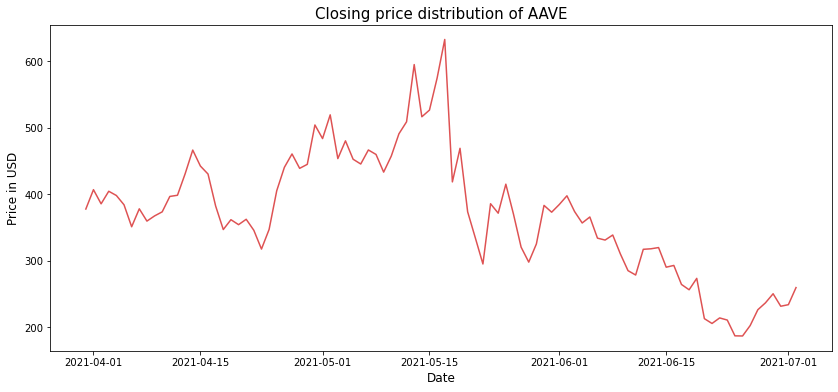

In [4]:
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(14,6))

sns.lineplot(y = base_df.close.values, x=base_df.index.values, alpha=0.8, color=color[3])
ax.xaxis.set_major_locator(mdates.AutoDateLocator())

plt.xlabel('Date', fontsize=12)
plt.ylabel('Price in USD', fontsize=12)
plt.title("Closing price distribution of AAVE", fontsize=15)

Text(0.5, 1.0, 'Daily price spread of AAVE')

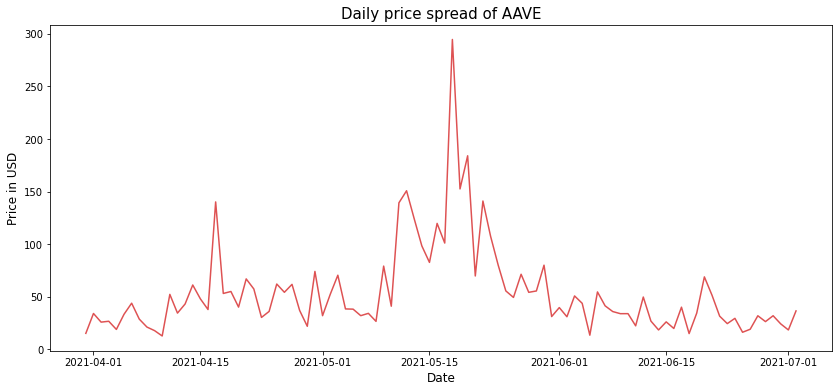

In [5]:
fig, ax = plt.subplots(figsize=(14,6))

sns.lineplot(y = base_df.spread.values, x=base_df.index.values, alpha=0.8, color=color[3])
ax.xaxis.set_major_locator(mdates.AutoDateLocator())

plt.xlabel('Date', fontsize=12)
plt.ylabel('Price in USD', fontsize=12)
plt.title("Daily price spread of AAVE", fontsize=15)

## Candlestick chart

In [6]:
import matplotlib.ticker as mticker
import mplfinance as mpf

temp_base_df = base_df.copy(deep=False)

temp_base_df = temp_base_df.drop(['spread'], axis=1)
temp_base_df

,open,high,low,close,adjclose,volume,ticker
2021-03-31,377.183685,385.298737,369.995331,377.611786,377.611786,342371946.0,AAVE-USD
2021-04-01,377.514648,408.479919,374.290924,406.692291,406.692291,480081712.0,AAVE-USD
2021-04-02,406.883606,411.377075,385.415894,385.420563,385.420563,395544800.0,AAVE-USD
2021-04-03,385.526978,409.579529,382.788849,404.309723,404.309723,330959728.0,AAVE-USD
2021-04-04,404.392944,407.329315,388.300354,397.924561,397.924561,306918909.0,AAVE-USD
...,...,...,...,...,...,...,...
2021-06-30,250.710434,251.974411,227.691422,231.626358,231.626358,330715116.0,AAVE-USD
2021-07-01,230.814117,234.483963,215.951538,233.948441,233.948441,256639522.0,AAVE-USD
2021-07-02,234.208481,265.107330,228.485199,259.655212,259.655212,385377799.0,AAVE-USD
2021-07-03,NaN,NaN,NaN,NaN,NaN,NaN,AAVE-USD


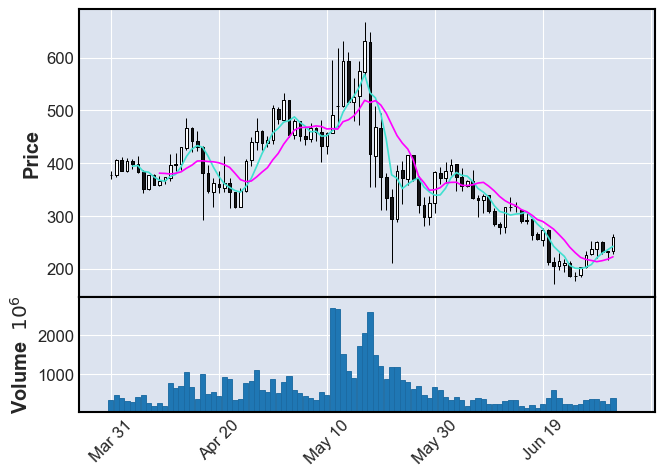

In [7]:
mpf.plot(temp_base_df, type='candle', mav=(5,10), volume=True)

## Future Price Prediction

In [8]:
from fbprophet import Prophet

In [9]:
price_predict_df = base_df['close'].copy(deep=False).reset_index()
price_predict_df.columns = ["ds", "y"]
price_predict_df = price_predict_df[price_predict_df['ds']>'2020-1-1']
price_predict_df

,ds,y
0,2021-03-31,377.611786
1,2021-04-01,406.692291
2,2021-04-02,385.420563
3,2021-04-03,404.309723
4,2021-04-04,397.924561
...,...,...
91,2021-06-30,231.626358
92,2021-07-01,233.948441
93,2021-07-02,259.655212
94,2021-07-03,NaN


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
111,2021-07-20,112.420342,10.888961,211.182714
112,2021-07-21,108.888540,4.631775,209.385394
113,2021-07-22,91.595383,-19.903379,206.115681
114,2021-07-23,79.416392,-45.748932,195.334743
115,2021-07-24,75.987836,-52.497970,200.076634


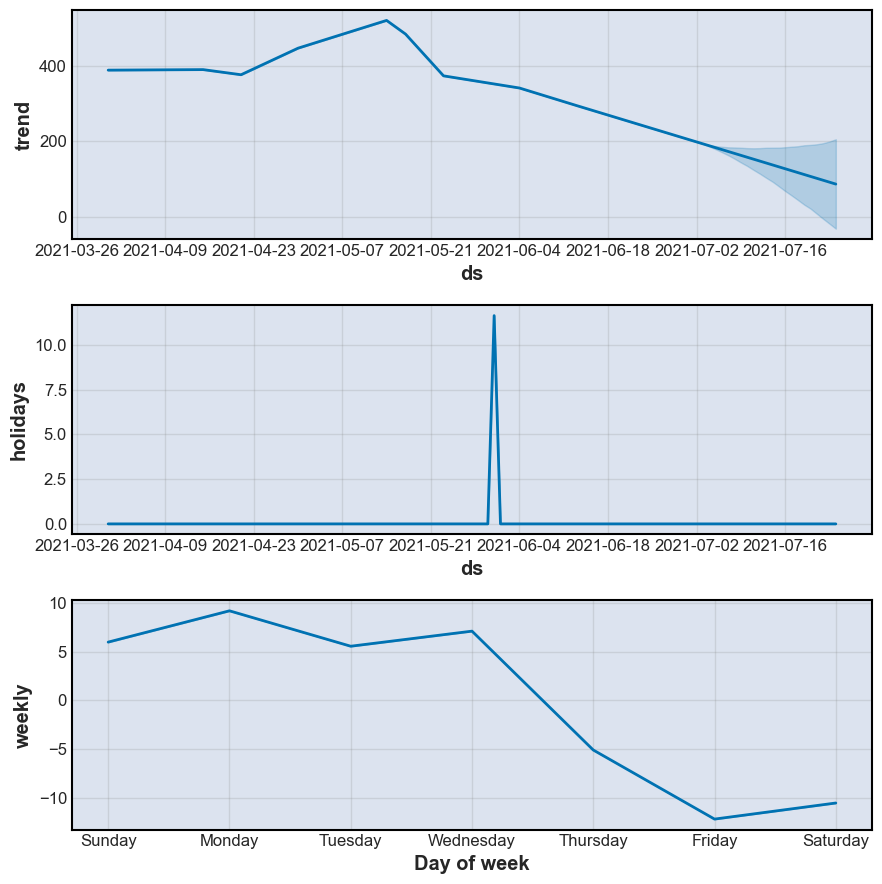

In [10]:
m = Prophet(changepoint_prior_scale=.7)
m.add_country_holidays(country_name='US')
m.fit(price_predict_df);
m.train_holiday_names

future = m.make_future_dataframe(periods=20)

forecast = m.predict(future)
fig = m.plot_components(forecast)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

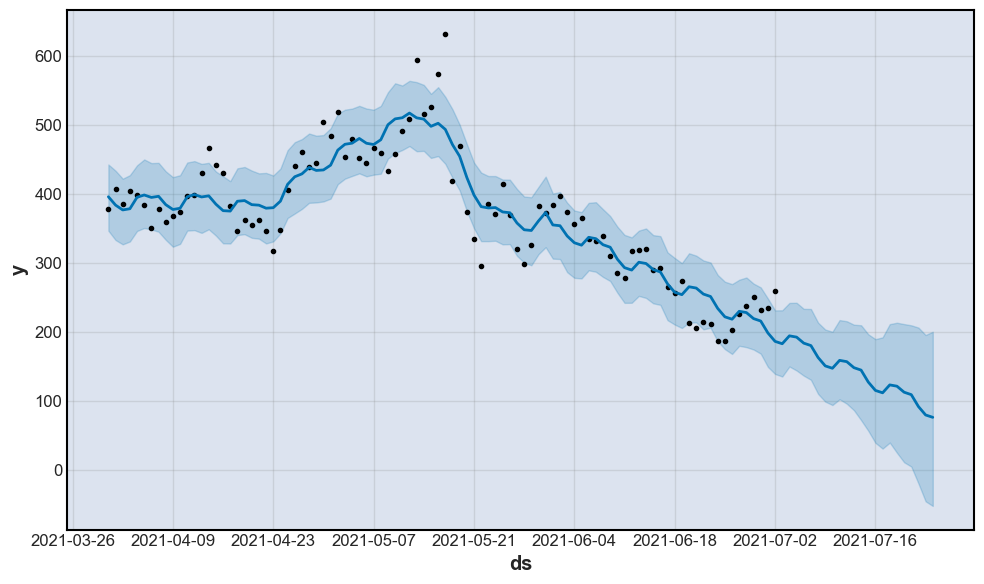

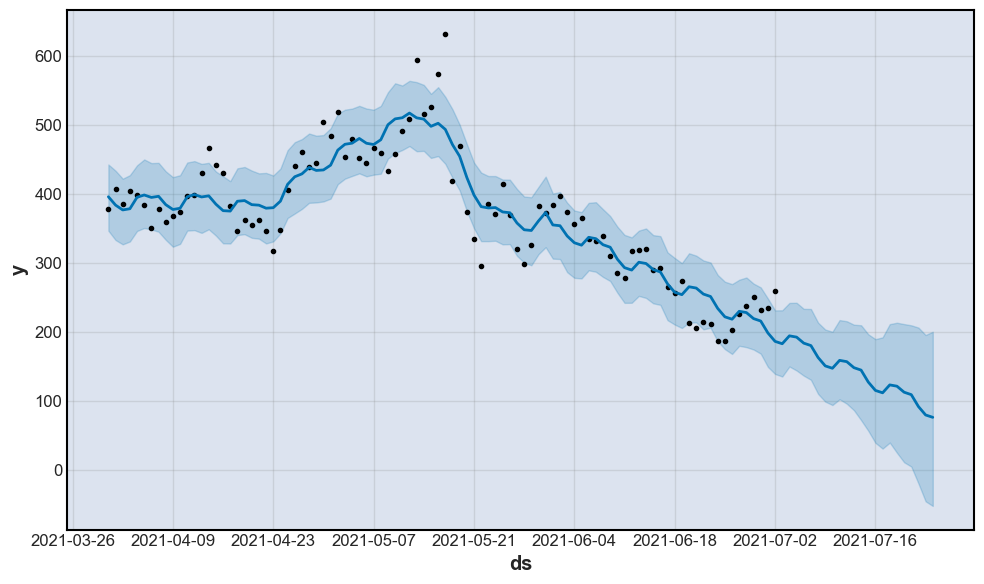

In [11]:
m.plot(forecast)